In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
sns.set()

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Scikit-learn（評価算出）
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [25]:
train = pd.read_csv('train.csv')
train

,name,date,code,market_name,market_key,v_kobo,kessan,p_kari,p_uri,bb,koutou,content,gyosyu,v_tani,d_uri,d_stocked,d_capital,cancel
0,株式会社インターファクトリー,2020/08/25,4057,マザーズ,ＳＭＢＣ日興証券、SBI証券,1110900,5,870円 - 960円,960,2020/08/07 - 2020/08/14,429.17,クラウド型ECプラットフォーム構築事業,情報・通信業,100,500000,3220000,116400000,0
1,ニューラルポケット株式会社,2020/08/20,4056,マザーズ,みずほ証券,630800,12,800円 - 900円,900,2020/08/04 - 2020/08/11,466.67,AIエンジニアリング事業（独自開発のAIアルゴリズムによる画像・動画解析技術とエッジコンピュ...,情報・通信業,100,133600,13369000,100000000,0
2,ティアンドエス株式会社,2020/08/07,4055,マザーズ,いちよし証券,277000,11,"2,650円 - 2,800円",2800,2020/07/20 - 2020/07/28,150.36,大手企業及び半導体工場向けシステム開発・運用保守・インフラ構築、AI関連のソフトウエア開発,情報・通信業,100,77000,1580700,74120000,0
3,株式会社モダリス,2020/08/03,4883,マザーズ,みずほ証券,3105000,12,"1,000円 - 1,200円",1200,2020/07/14 - 2020/07/20,110.00,コアとなるプラットフォーム技術である『切らないCRISPR技術（CRISPR-GNDM技術）...,医薬品,100,600000,25100000,1300000000,0
4,日本情報クリエイト株式会社,2020/07/31,4054,マザーズ,野村證券,1713500,6,"1,200円 - 1,300円",1300,2020/07/13 - 2020/07/17,70.00,不動産業者向けソフトウエア・サービスの提供,情報・通信業,100,690000,5883720,74395000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,マックハウス,1999/02/10,7603,ＪＱ,野村證券,1400000,2,"1,000円 - 1,000円",1200,1999/01/25 - 1999/01/28,16.66,ジーンズを中心としたアメリカンカジュアルウエア専門店の経営,小売業,1000,650000,8500000,1235350000,0
2145,ポプラ,1999/02/05,7601,ＪＱ,野村證券,1300000,2,"1,000円 - 1,000円",1200,1999/01/20 - 1999/01/25,72.50,フランチャイズチェーンシステムによるコンビニエンスストアの経営,小売業,1000,300000,5191900,739737735,0
2146,船井電機,1999/02/04,6839,大証２部,大和証券エスビー,2000000,6,"3,800円 - 3,800円",4800,1999/01/19 - 1999/01/22,100.00,映像機器を中心とした電気製品の製造販売等,電気機器,100,500000,9646000,482532000,0
2147,ニッコウトラベル,1999/02/02,9373,ＪＱ,野村證券,800000,3,500円 - 500円,560,1999/01/14 - 1999/01/20,101.78,熟年層を対象とした海外旅行の企画及び販売,倉庫・運輸関連業,1000,400000,3500000,183750000,0


In [26]:
train.describe()

,code,v_kobo,kessan,p_uri,koutou,v_tani,d_uri,d_stocked,d_capital,cancel
count,2149.000000,2.149000e+03,2149.000000,2.149000e+03,2149.000000,2149.000000,2.149000e+03,2.149000e+03,2.149000e+03,2149.0
mean,4867.609121,3.775985e+06,5.525826,2.387313e+05,72.660172,220.421126,2.582057e+06,1.524824e+07,5.460420e+09,0.0
std,2161.929395,4.313524e+07,3.525764,1.077703e+06,104.294681,356.563918,3.898999e+07,1.791736e+08,1.084634e+11,0.0
min,1381.000000,5.000000e+02,1.000000,9.000000e+01,-72.500000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,3178.000000,5.500000e+03,3.000000,1.250000e+03,3.840000,1.000000,8.800000e+02,2.730000e+04,1.500000e+08,0.0
50%,4309.000000,5.161000e+05,3.000000,2.510000e+03,36.480000,100.000000,1.082000e+05,2.000000e+06,3.180000e+08,0.0
75%,6618.000000,1.279300e+06,9.000000,2.000000e+05,108.840000,100.000000,5.000000e+05,5.616000e+06,6.475000e+08,0.0
max,9551.000000,1.764063e+09,12.000000,3.300000e+07,988.890000,1000.000000,1.603694e+09,4.787145e+09,3.500000e+12,0.0


## 必要なデータに絞り込む

### 期間を絞り込む

In [27]:
train = train[train['date'] > '2020/01/01']
train

,name,date,code,market_name,market_key,v_kobo,kessan,p_kari,p_uri,bb,koutou,content,gyosyu,v_tani,d_uri,d_stocked,d_capital,cancel
0,株式会社インターファクトリー,2020/08/25,4057,マザーズ,ＳＭＢＣ日興証券、SBI証券,1110900,5,870円 - 960円,960,2020/08/07 - 2020/08/14,429.17,クラウド型ECプラットフォーム構築事業,情報・通信業,100,500000,3220000,116400000,0
1,ニューラルポケット株式会社,2020/08/20,4056,マザーズ,みずほ証券,630800,12,800円 - 900円,900,2020/08/04 - 2020/08/11,466.67,AIエンジニアリング事業（独自開発のAIアルゴリズムによる画像・動画解析技術とエッジコンピュ...,情報・通信業,100,133600,13369000,100000000,0
2,ティアンドエス株式会社,2020/08/07,4055,マザーズ,いちよし証券,277000,11,"2,650円 - 2,800円",2800,2020/07/20 - 2020/07/28,150.36,大手企業及び半導体工場向けシステム開発・運用保守・インフラ構築、AI関連のソフトウエア開発,情報・通信業,100,77000,1580700,74120000,0
3,株式会社モダリス,2020/08/03,4883,マザーズ,みずほ証券,3105000,12,"1,000円 - 1,200円",1200,2020/07/14 - 2020/07/20,110.00,コアとなるプラットフォーム技術である『切らないCRISPR技術（CRISPR-GNDM技術）...,医薬品,100,600000,25100000,1300000000,0
4,日本情報クリエイト株式会社,2020/07/31,4054,マザーズ,野村證券,1713500,6,"1,200円 - 1,300円",1300,2020/07/13 - 2020/07/17,70.00,不動産業者向けソフトウエア・サービスの提供,情報・通信業,100,690000,5883720,74395000,0
5,株式会社Sun Asterisk,2020/07/31,4053,マザーズ,大和証券,4830000,12,630円 - 700円,700,2020/07/14 - 2020/07/20,72.71,産業のデジタライゼーションを推進するデジタル・クリエイティブスタジオ事業,情報・通信業,100,2150000,34160000,805500000,0
6,GMOフィナンシャルゲート株式会社,2020/07/15,4051,マザーズ,大和証券,516100,9,"2,420円 - 2,540円",2540,2020/06/30 - 2020/07/06,157.87,クレジットカード、デビットカード、電子マネー、ポイント等による対面型決済を行う決済端末の提供...,情報・通信業,100,208800,3595170,1173309000,0
7,株式会社アイキューブドシステムズ,2020/07/15,4495,マザーズ,野村證券,172500,6,"2,720円 - 3,120円",3120,2020/06/29 - 2020/07/03,202.24,法人向けモバイルデバイス管理サービスの提供,情報・通信業,100,0,5011350,100000000,0
8,KIYOラーニング株式会社,2020/07/15,7353,マザーズ,ＳＭＢＣ日興証券,391200,12,"2,070円 - 2,300円",2300,2020/06/30 - 2020/07/06,133.04,個人向けオンライン資格講座及び法人向け社員教育クラウドサービスの提供,サービス業,100,40200,1845000,388050000,0
9,株式会社Speee,2020/07/10,4499,JQS,野村證券,1121900,9,"2,520円 - 2,880円",2880,2020/06/25 - 2020/06/30,78.82,データ資産を利活用したマーケティング活動を支援するMarTech事業及び消費者と事業者を繋ぐ...,情報・通信業,100,120000,8900000,36640000,0


In [28]:
def make_y(x):
    if x <= 0.0:
        return 0
    elif (x > 0.0) and (x <= 50.0):
        return 1
    elif (x > 50.0) and (x <= 100.0):
        return 2
    elif (x > 100.0) and (x <= 250.0):
        return 3
    else:
        return 4

In [29]:
y = train['koutou'].apply(make_y)
train = train.drop(['koutou', 'cancel'], axis=1)

<AxesSubplot:xlabel='koutou', ylabel='market_name'>

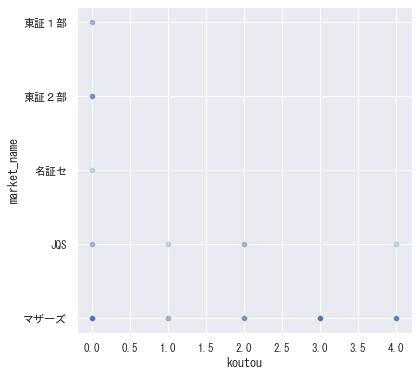

In [30]:
plt.figure(figsize=(6, 6))
plt.rcParams["font.family"] = "MS Gothic"
# plt.xticks(rotation=90)
sns.scatterplot(y, train['market_name'], alpha=0.3)

In [31]:
# le = LabelEncoder()
# train['market_code'] = le.fit_transform(train['market_name'])
# train['market_code']

<AxesSubplot:xlabel='koutou', ylabel='gyosyu'>

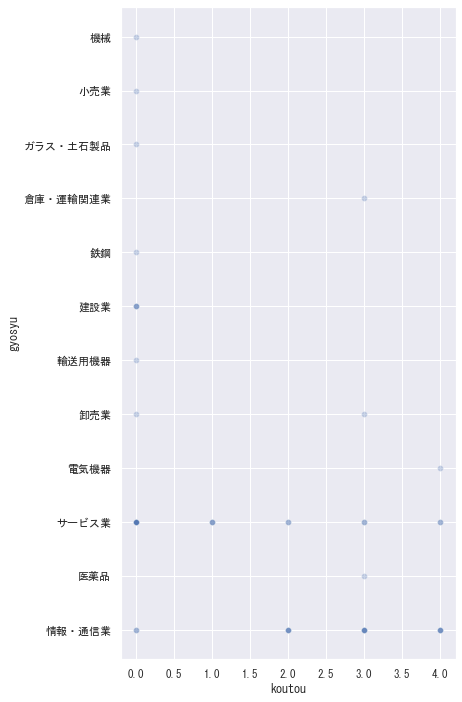

In [32]:
plt.figure(figsize=(6, 12))
# plt.xticks(rotation=90)
sns.scatterplot(y, train['gyosyu'], alpha=0.3)

In [33]:
# le = LabelEncoder()
# train['gyosyu_code'] = le.fit_transform(train['gyosyu'])
# train['gyosyu_code']

<AxesSubplot:xlabel='koutou', ylabel='market_key'>

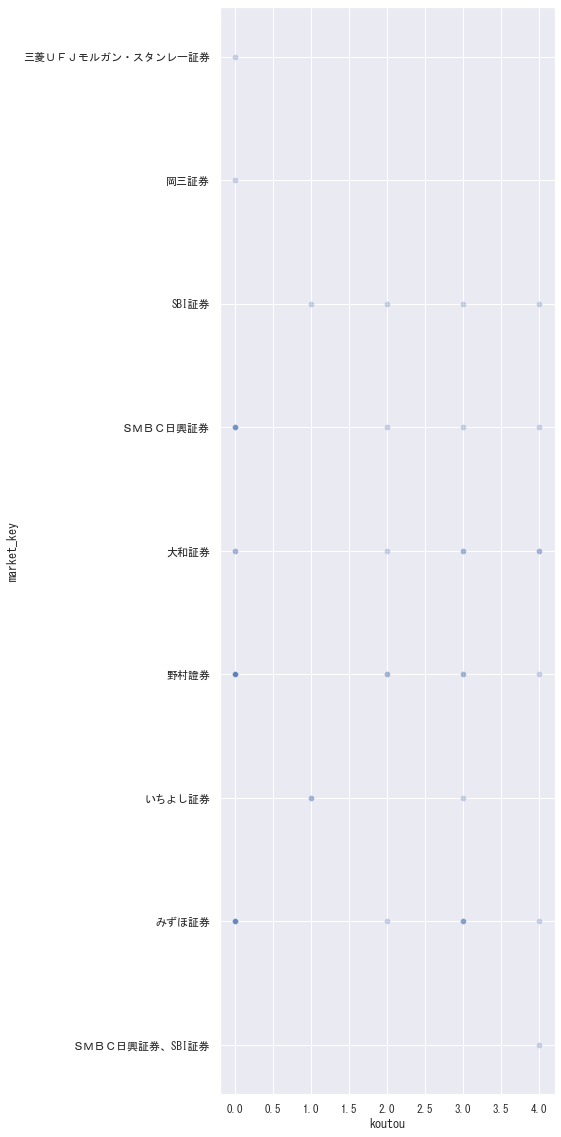

In [34]:
plt.figure(figsize=(6, 20))
sns.scatterplot(y, train['market_key'], alpha=0.3)

In [35]:
train['market_name'].value_counts()

マザーズ    32
JQS      6
東証２部     4
東証１部     2
名証セ      1
Name: market_name, dtype: int64

In [36]:
std = StandardScaler()
v_kobo_std = std.fit_transform(train['v_kobo'].values.reshape(-1, 1))
v_kobo_std

array([[-0.16810362],
       [-0.44042762],
       [-0.6411113 ],
       [ 0.96299677],
       [ 0.17370527],
       [ 1.94145732],
       [-0.50548816],
       [-0.70038616],
       [-0.57633437],
       [-0.16186416],
       [-0.55080932],
       [-0.36787974],
       [-0.62222276],
       [-0.44990026],
       [-0.41989413],
       [ 0.67127372],
       [-0.39380185],
       [-0.39187329],
       [-0.14365629],
       [-0.74933754],
       [-0.19442279],
       [-0.60821234],
       [-0.75852656],
       [ 0.4737665 ],
       [ 2.34770279],
       [-0.24377123],
       [-0.510423  ],
       [-0.11330983],
       [-0.02850991],
       [-0.60843923],
       [-0.40684799],
       [-0.19028206],
       [-0.57134281],
       [-0.6025401 ],
       [-0.27638659],
       [-0.55897734],
       [ 0.65045662],
       [ 5.07162351],
       [ 0.34143326],
       [ 0.36831965],
       [-0.27638659],
       [ 0.77694746],
       [-0.43294027],
       [ 0.0306515 ],
       [-0.14592518]])

<AxesSubplot:xlabel='koutou'>

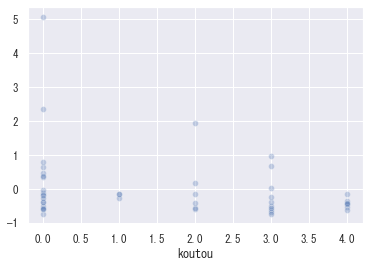

In [37]:
sns.scatterplot(y, v_kobo_std.flatten(), alpha=0.3)

<AxesSubplot:xlabel='koutou', ylabel='v_tani'>

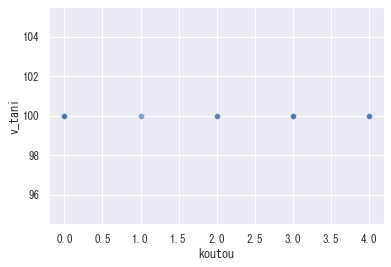

In [38]:
sns.scatterplot(y, train['v_tani'], alpha=0.3)

<AxesSubplot:xlabel='koutou', ylabel='kessan'>

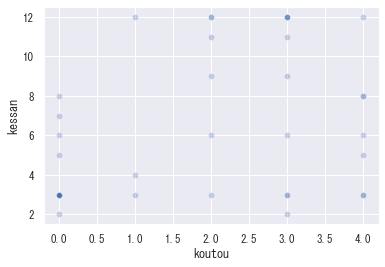

In [39]:
sns.scatterplot(y, train['kessan'], alpha=0.3)

In [40]:
train['main_market'] = train['market_key'].apply(lambda x: x.split('、')[0])
train['main_market']

0              ＳＭＢＣ日興証券
1                 みずほ証券
2                いちよし証券
3                 みずほ証券
4                  野村證券
5                  大和証券
6                  大和証券
7                  野村證券
8              ＳＭＢＣ日興証券
9                  野村證券
10                SBI証券
11                 大和証券
12                 野村證券
13                 大和証券
14             ＳＭＢＣ日興証券
15                みずほ証券
16                 野村證券
17                 野村證券
18                SBI証券
19                 岡三証券
20             ＳＭＢＣ日興証券
21                SBI証券
22                SBI証券
23                 大和証券
24                 野村證券
25                みずほ証券
26                みずほ証券
27                 大和証券
28             ＳＭＢＣ日興証券
29                 野村證券
30                みずほ証券
31                みずほ証券
32                みずほ証券
33             ＳＭＢＣ日興証券
34                 野村證券
35             ＳＭＢＣ日興証券
36                みずほ証券
37                 野村證券
38                 野村證券
39             ＳＭＢＣ日興証券
40               いちよし証券
41    三菱ＵＦＪモルガン・

<AxesSubplot:xlabel='koutou', ylabel='main_market'>

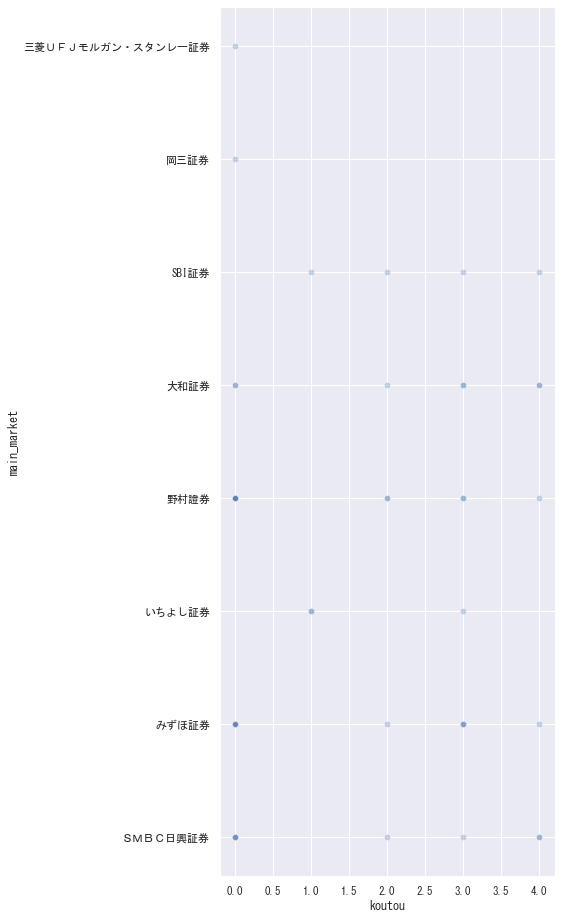

In [41]:
plt.figure(figsize=(6, 16))
sns.scatterplot(y, train['main_market'], alpha=0.3)

In [42]:
# le = LabelEncoder()
# train['main_market_code'] = le.fit_transform(train['main_market'])
# train['main_market_code']

In [43]:
train['raised'] = train['v_kobo'] * train['p_uri']
train['raised']

0      1066464000
1       567720000
2       775600000
3      3726000000
4      2227550000
5      3381000000
6      1310894000
7       538200000
8       899760000
9      3231072000
10      213738000
11      523503000
12      418905000
13      982560000
14      346840000
15     5181400000
16     1426000000
17      651924000
18     2111820000
19      323250000
20     1809650000
21      412050000
22      315000000
23     1838850000
24     5324352000
25      478975000
26      862580000
27     1135050000
28     2144060000
29     1304940000
30     1607700000
31      953902000
32      960000000
33      672750000
34     1628400000
35     1159950000
36     3831000000
37    13556404000
38     4661344000
39     2467920000
40     2079200000
41     2082750000
42     1416800000
43     1461300000
44     2173500000
Name: raised, dtype: int64

In [45]:
train = pd.get_dummies(train, drop_first=True, columns=['market_name', 'market_key', 'gyosyu'])

In [46]:
train['y'] = y

In [47]:
abs(train.corr()['y'].drop('y')).sort_values(ascending=False)[:5]

kessan              0.449908
gyosyu_情報・通信業       0.441060
market_name_マザーズ    0.378105
market_name_東証２部    0.323237
raised              0.294151
Name: y, dtype: float64

## RandomForestClassifier

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   name                          45 non-null     object
 1   date                          45 non-null     object
 2   code                          45 non-null     int64 
 3   v_kobo                        45 non-null     int64 
 4   kessan                        45 non-null     int64 
 5   p_kari                        45 non-null     object
 6   p_uri                         45 non-null     int64 
 7   bb                            45 non-null     object
 8   content                       45 non-null     object
 9   v_tani                        45 non-null     int64 
 10  d_uri                         45 non-null     int64 
 11  d_stocked                     45 non-null     int64 
 12  d_capital                     45 non-null     int64 
 13  main_market           

In [50]:
col_i = train.drop(['y', 'code'], axis=1).select_dtypes(exclude='object').columns.tolist()
col_i

['v_kobo',
 'kessan',
 'p_uri',
 'v_tani',
 'd_uri',
 'd_stocked',
 'd_capital',
 'raised',
 'market_name_マザーズ',
 'market_name_名証セ',
 'market_name_東証１部',
 'market_name_東証２部',
 'market_key_いちよし証券',
 'market_key_みずほ証券',
 'market_key_三菱ＵＦＪモルガン・スタンレー証券',
 'market_key_大和証券',
 'market_key_岡三証券',
 'market_key_野村證券',
 'market_key_ＳＭＢＣ日興証券',
 'market_key_ＳＭＢＣ日興証券、SBI証券',
 'gyosyu_サービス業',
 'gyosyu_倉庫・運輸関連業',
 'gyosyu_医薬品',
 'gyosyu_卸売業',
 'gyosyu_小売業',
 'gyosyu_建設業',
 'gyosyu_情報・通信業',
 'gyosyu_機械',
 'gyosyu_輸送用機器',
 'gyosyu_鉄鋼',
 'gyosyu_電気機器']

In [51]:
best5_cols = abs(train.corr()['y'].drop('y')).sort_values(ascending=False)[:5].index.tolist()

In [52]:
X = train[best5_cols]

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
predict = model.predict(X_train)
predict

array([3, 4, 0, 4, 0, 1, 0, 0, 3, 0, 2, 0, 3, 3, 0, 4, 4, 2, 0, 3, 1, 0,
       2, 0, 3, 4, 4, 3, 2, 0, 0], dtype=int64)

In [57]:
accuracy_score(y_train, predict)

1.0

In [58]:
y_predict =  model.predict(X_test)

In [59]:
accuracy_score(y_test, y_predict)

0.42857142857142855

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
params = {
    'max_depth': range(1, 10)
}

In [62]:
gcv = GridSearchCV(model, params, cv=5, verbose=2)
gcv.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ............

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................................... max_depth=7, total=   0.0s
[CV] max_depth=8 .....................................................
[CV] ...................................... max_depth=8, total=   0.0s
[CV] max_depth=8 .....................................................
[CV] ...................................... max_depth=8, total=   0.0s
[CV] max_depth=8 .....................................................
[CV] ...................................... max_depth=8, total=   0.0s
[CV] max_depth=8 .....................................................
[CV] ...................................... max_depth=8, total=   0.0s
[CV] max_depth=8 .....................................................
[CV] ...................................... max_depth=8, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)}, verbose=2)

In [63]:
gcv.best_params_

{'max_depth': 1}

In [64]:
gcv.best_score_

0.48888888888888893

In [65]:
X

,kessan,gyosyu_情報・通信業,market_name_マザーズ,market_name_東証２部,raised
0,5,1,1,0,1066464000
1,12,1,1,0,567720000
2,11,1,1,0,775600000
3,12,0,1,0,3726000000
4,6,1,1,0,2227550000
5,12,1,1,0,3381000000
6,9,1,1,0,1310894000
7,6,1,1,0,538200000
8,12,0,1,0,899760000
9,9,1,0,0,3231072000


In [66]:
X

,kessan,gyosyu_情報・通信業,market_name_マザーズ,market_name_東証２部,raised
0,5,1,1,0,1066464000
1,12,1,1,0,567720000
2,11,1,1,0,775600000
3,12,0,1,0,3726000000
4,6,1,1,0,2227550000
5,12,1,1,0,3381000000
6,9,1,1,0,1310894000
7,6,1,1,0,538200000
8,12,0,1,0,899760000
9,9,1,0,0,3231072000


In [67]:
params = {
    'max_depth': range(1, 10)
}

In [77]:
scaler = MinMaxScaler()
X = scaler.fit_transform(train[col_i])
X = pd.DataFrame(X, columns=col_i)
X

,v_kobo,kessan,p_uri,v_tani,d_uri,d_stocked,d_capital,raised,market_name_マザーズ,market_name_名証セ,...,gyosyu_倉庫・運輸関連業,gyosyu_医薬品,gyosyu_卸売業,gyosyu_小売業,gyosyu_建設業,gyosyu_情報・通信業,gyosyu_機械,gyosyu_輸送用機器,gyosyu_鉄鋼,gyosyu_電気機器
0,0.101271,0.3,0.117207,0.0,0.051687,0.034433,0.063503,0.063910,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.054561,1.0,0.102244,0.0,0.013811,0.158355,0.053896,0.026530,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.020139,0.9,0.576060,0.0,0.007960,0.014417,0.038735,0.042110,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.295279,1.0,0.177057,0.0,0.062024,0.301594,0.756883,0.263235,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.159898,0.4,0.201995,0.0,0.071328,0.066958,0.038896,0.150930,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.463107,1.0,0.052369,0.0,0.222254,0.412219,0.467194,0.237378,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.043402,0.7,0.511222,0.0,0.021585,0.039014,0.682665,0.082229,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.009972,0.4,0.655860,0.0,0.000000,0.056306,0.053896,0.024318,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.031250,1.0,0.451372,0.0,0.004156,0.017644,0.222642,0.051416,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.102341,0.7,0.596010,0.0,0.012405,0.103787,0.016778,0.226142,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [78]:
result_score = []

for model in tqdm([DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier(), LGBMClassifier()]):
    X = train[col_i]
    for i in range(len(X.columns), 0, -1):
        row = {}
        choice_cols = abs(train.corr()['y'].drop('y')).sort_values(ascending=False)[:i].index.tolist()
        X = train[choice_cols]
        gcv = GridSearchCV(model, params, cv=5, verbose=0)
        gcv.fit(X, y)
        row['name'] = model
        row['counts'] = i
        row['features'] = choice_cols
        row['score'] = gcv.best_score_
        row['depth'] = gcv.best_params_
        result_score.append(row)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\anaconda3\lib\site-packages\sk

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:57<00:00, 74.48s/it]

Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


In [79]:
pd.DataFrame(result_score).sort_values('score', ascending=False)

,name,counts,features,score,depth
58,RandomForestClassifier(),4,"[kessan, gyosyu_情報・通信業, market_name_マザーズ, mark...",0.555556,{'max_depth': 1}
31,RandomForestClassifier(),31,"[kessan, gyosyu_情報・通信業, market_name_マザーズ, mark...",0.555556,{'max_depth': 6}
61,RandomForestClassifier(),1,[kessan],0.533333,{'max_depth': 1}
50,RandomForestClassifier(),12,"[kessan, gyosyu_情報・通信業, market_name_マザーズ, mark...",0.533333,{'max_depth': 2}
51,RandomForestClassifier(),11,"[kessan, gyosyu_情報・通信業, market_name_マザーズ, mark...",0.533333,{'max_depth': 6}
...,...,...,...,...,...
95,LGBMClassifier(),29,"[kessan, gyosyu_情報・通信業, market_name_マザーズ, mark...",0.422222,{'max_depth': 1}
94,LGBMClassifier(),30,"[kessan, gyosyu_情報・通信業, market_name_マザーズ, mark...",0.422222,{'max_depth': 1}
93,LGBMClassifier(),31,"[kessan, gyosyu_情報・通信業, market_name_マザーズ, mark...",0.422222,{'max_depth': 1}
91,"XGBClassifier(base_score=None, booster=None, c...",2,"[kessan, gyosyu_情報・通信業]",0.422222,{'max_depth': 1}


In [ ]:
# 2020
# 33	XGBClassifier(base_score=None, booster=None, c...	3	0.533333	{'max_depth': 1}
# 2019
# 32	XGBClassifier(base_score=None, booster=None, c...	4	0.481481	{'max_depth': 1}
# 2018
# 31	XGBClassifier(base_score=None, booster=None, c...	5	0.480404	{'max_depth': 8}

In [ ]:
train

In [ ]:
train.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()

In [ ]:
sns.pairplot(train)